<a href="https://colab.research.google.com/github/chi-hun/chi-hun/blob/main/dicom(_dcm)_%26_Segmentations(_nii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참조
https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda

In [187]:
!pip install pydicom
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [250]:
import pydicom
import nibabel
import SimpleITK as sitk
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/공부/dcm, nii.zip'

# dicom(.dcm)

In [125]:
def sort_key(x):
    return int(x.split('/')[-1].split('.')[0])

dicom_list = sorted(glob.glob('/content/dcm_smaple/1.2.826.0.1.3680043.22327/*.dcm'), key=sort_key)

In [126]:
dcm_one = pydicom.read_file(dicom_list[0])
dcm_one

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.22327.1.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.22327.1.1
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '184152.142329'
(0010, 0010) Patient's Name                      PN: '22327'
(0010, 0020) Patient ID                          LO: '22327'
(0018, 0050) Slice Thickness                     DS: '0.625'
(0020, 000d) Study Instance UID                  UI: 1.2.826.0.1

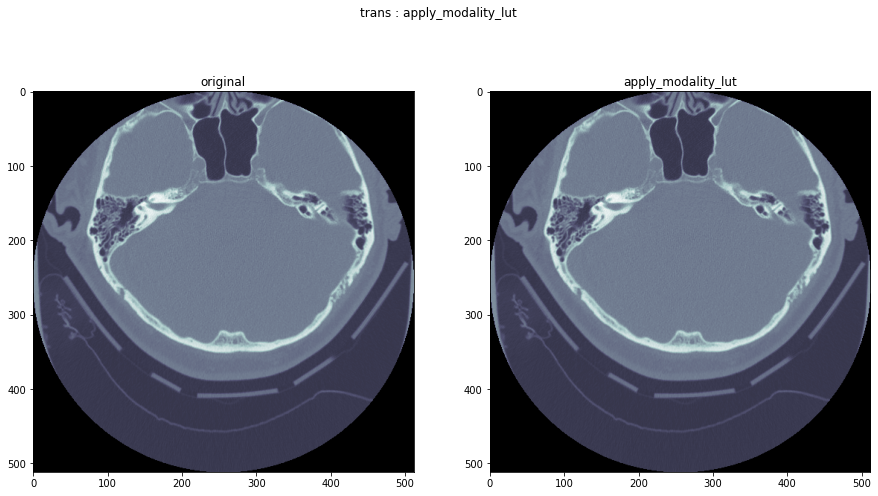

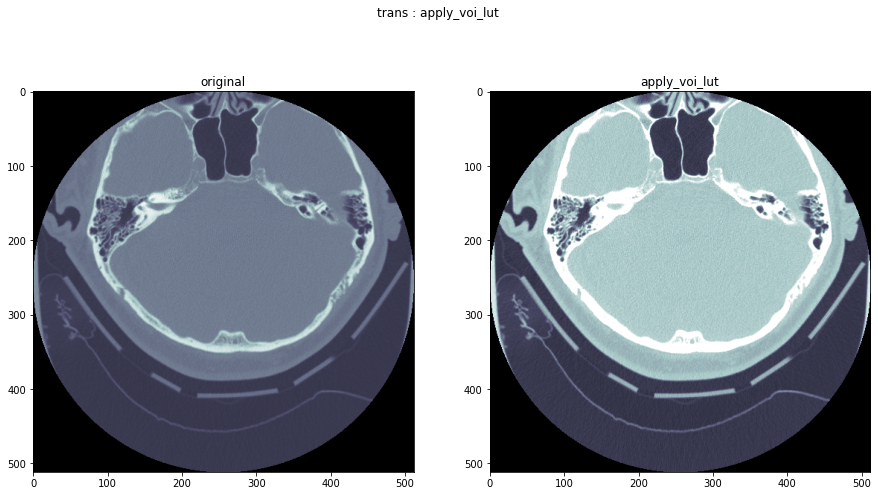

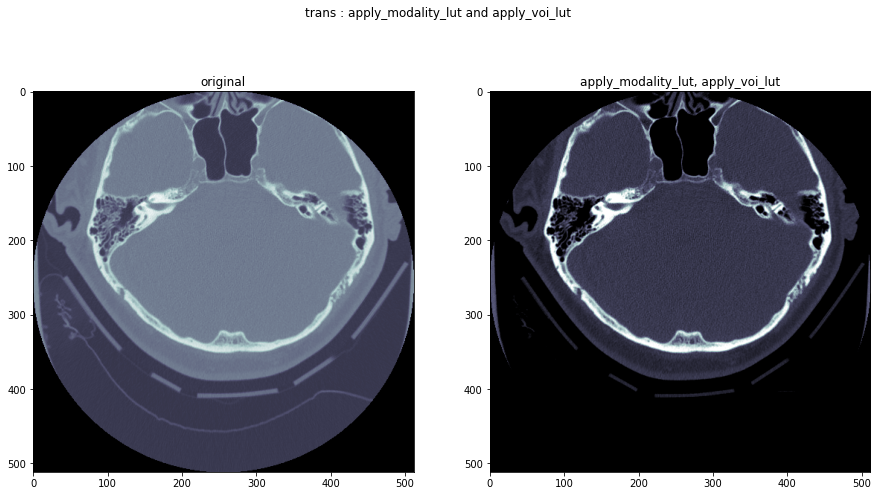

In [211]:
dicom_file = pydicom.read_file(dicom_list[0])

plt.figure(figsize=(15,8))
plt.suptitle('trans : apply_modality_lut')
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(dicom_file.pixel_array, cmap='bone')
plt.subplot(1,2,2)
plt.title('apply_modality_lut')
plt.imshow(pydicom.pixel_data_handlers.apply_modality_lut(dicom_file.pixel_array, dicom_file), cmap='bone')
plt.show()

plt.figure(figsize=(15,8))
plt.suptitle('trans : apply_voi_lut')
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(dicom_file.pixel_array, cmap='bone')
plt.subplot(1,2,2)
plt.title('apply_voi_lut')
plt.imshow(pydicom.pixel_data_handlers.apply_voi_lut(dicom_file.pixel_array, dicom_file), cmap='bone')
plt.show()

plt.figure(figsize=(15,8))
plt.suptitle('trans : apply_modality_lut and apply_voi_lut')
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(dicom_file.pixel_array, cmap='bone')
plt.subplot(1,2,2)
plt.title('apply_modality_lut, apply_voi_lut')
plt.imshow(pydicom.pixel_data_handlers.apply_voi_lut(pydicom.pixel_data_handlers.apply_modality_lut(dicom_file.pixel_array, dicom_file), dicom_file), cmap='bone')
plt.show()

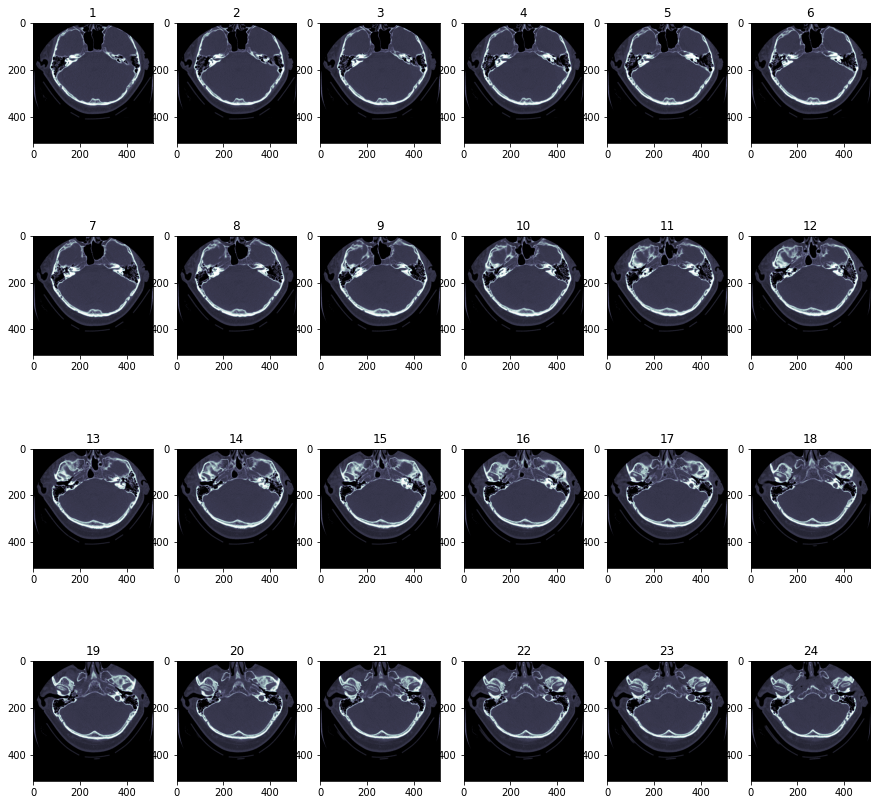

In [212]:
start = 1
subp = 1
plt.figure(figsize=(15,15))
for i in range(start, start+24):
    plt.subplot(4,6,subp)
    dicom_file = pydicom.read_file(dicom_list[i-1])
    img = pydicom.pixel_data_handlers.apply_modality_lut(dicom_file.pixel_array, dicom_file)
    img = pydicom.pixel_data_handlers.apply_voi_lut(img, dicom_file)
    plt.title(dicom_file.InstanceNumber)
    plt.imshow(img, cmap='bone')
    subp += 1
plt.show()

In [132]:
bbox = pd.read_csv('/content/bbound/train_bounding_boxes.csv')
bbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7217 entries, 0 to 7216
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StudyInstanceUID  7217 non-null   object 
 1   x                 7217 non-null   float64
 2   y                 7217 non-null   float64
 3   width             7217 non-null   float64
 4   height            7217 non-null   float64
 5   slice_number      7217 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 338.4+ KB


In [136]:
bbox.head()

,StudyInstanceUID,x,y,width,height,slice_number
0,1.2.826.0.1.3680043.10051,219.27715,216.71419,17.30440,20.38517,133
1,1.2.826.0.1.3680043.10051,221.56460,216.71419,17.87844,25.24362,134
2,1.2.826.0.1.3680043.10051,216.82151,221.62546,27.00959,26.37454,135
3,1.2.826.0.1.3680043.10051,214.49455,215.48637,27.92726,37.51363,136
4,1.2.826.0.1.3680043.10051,214.00000,215.48637,27.00000,43.51363,137


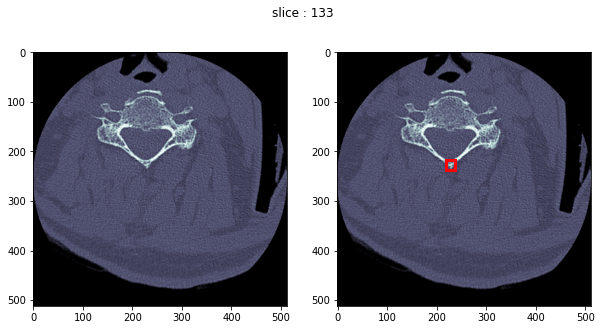

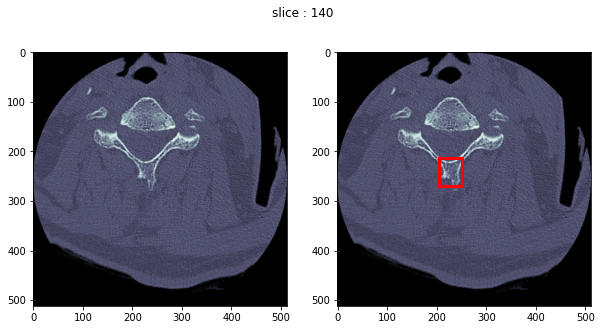

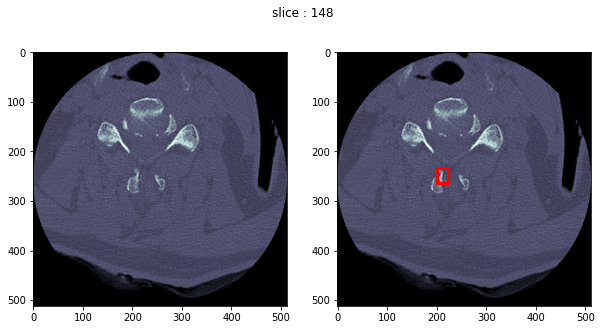

In [215]:
dcm_slice_no = [133, 140 ,148]
for i in dcm_slice_no:
    plt.figure(figsize=[10,5])
    plt.suptitle(f'slice : {i}')
    dicom_file = pydicom.read_file(f'/content/bbound/{str(i)}.dcm')
    for j in range(1,3):
        plot_s = plt.subplot(1, 2, j)
        img = pydicom.pixel_data_handlers.apply_modality_lut(dicom_file.pixel_array, dicom_file)
        img =  pydicom.pixel_data_handlers.apply_voi_lut(img, dicom_file)
        plot_s.imshow(img, cmap='bone')
        if j == 2:
            bbox_info = bbox[(bbox['StudyInstanceUID'] == '1.2.826.0.1.3680043.10051') & (bbox['slice_number'] == i)]
            plot_s.add_patch(patches.Rectangle((bbox_info.x.values, bbox_info.y.values), bbox_info.width.values, bbox_info.height.values,
                                               linewidth = 3, edgecolor='r', facecolor='none'))
    plt.show()

# SimpleITK

In [231]:
dcm_file = pydicom.read_file('/content/dcm_smaple/1.2.826.0.1.3680043.22327/1.dcm')
dcm_array = dcm_file.pixel_array
dcm_array = np.expand_dims(dcm_array, axis=2)
print(dcm_array.shape)
sitk_img = sitk.GetImageFromArray(np.transpose(dcm_array, (2,1,0))) # sitk는 z,y,x 순으로 생각
print(sitk_img.Get_Size())

(512, 512, 1)
(512, 512, 1)


# dicom -> png

In [289]:
dicom_list[0]
def read_dicom(path, size=(200,200)):
    dicom_file = pydicom.read_file(path)
    dicom_array = dicom_file.pixel_array
    if dicom_file.PhotometricInterpretation == "MONOCHROME1":
        dicom_array = np.amax(dicom_array) - dicom_array
    dicom_array = (dicom_array - dicom_array.min()) / dicom_array.max()
    dicom_array = (dicom_array * 255).astype('uint8')

    img = cv2.resize(dicom_array, size)
    cv2.imwrite(f'{path[:-4]}.png', img)

read_dicom(dicom_list[0])

# Segmentations(.nii)

In [129]:
nii_file = nibabel.load('/content/nii_smaple/1.2.826.0.1.3680043.10633.nii')
seg = nii_file.get_fdata()
seg.shape

(512, 512, 429)

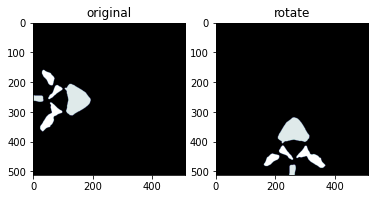

In [130]:
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(seg[:,:,0], cmap='bone')
plt.subplot(1,2,2)
plt.title('rotate')
plt.imshow(seg[:,::-1,:].transpose(2,1,0)[0], cmap='bone')
plt.show()

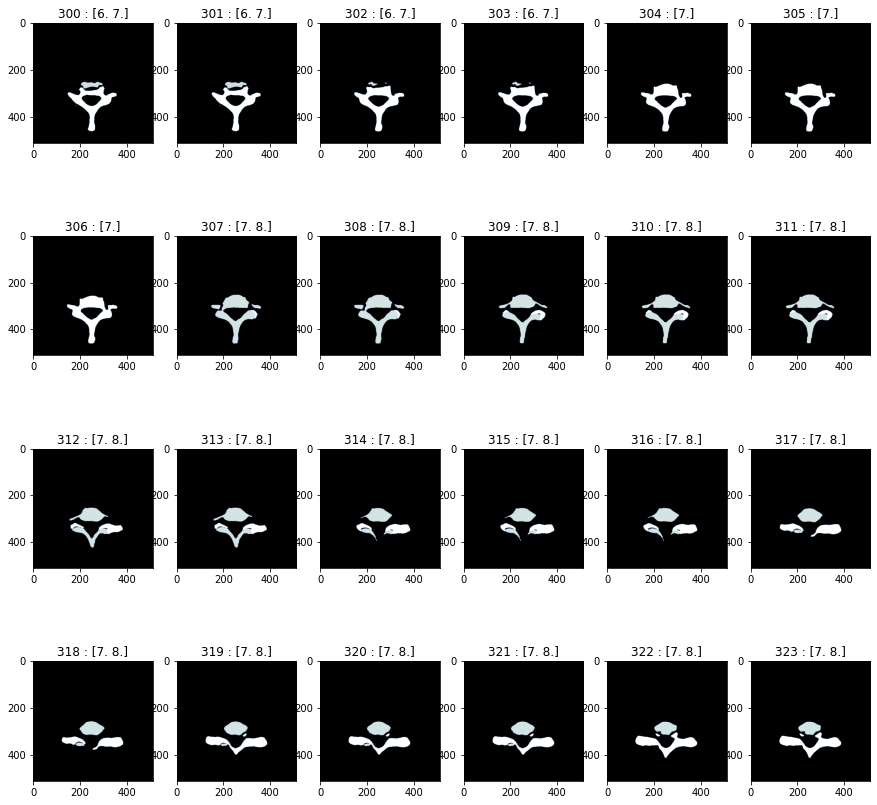

In [131]:
start = 300
subp = 1
plt.figure(figsize=(15,15))
seg_cov = seg[:,::-1,::-1].transpose(2,1,0)
for i in range(start, start+24):
    plt.subplot(4,6,subp)
    img = seg_cov[i]
    bone_no = np.unique(img)[1:]
    plt.title(f'{i} : {bone_no}')
    plt.imshow(img, cmap='bone')
    subp += 1
plt.show()